#  Activity Recognition from Single Chest-Mounted Accelerometer Data Set

In [1]:
import numpy as np
import pandas as pd
from glob import glob
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.utils import shuffle 

In [2]:
import sys
sys.version

'3.7.4 (default, Aug 13 2019, 15:17:50) \n[Clang 4.0.1 (tags/RELEASE_401/final)]'

__Goal:__ The activities are predicted based the movements traced by the  accelerometer for 15 users. Every participant wore a custom-developed chest-mounted uncaliberated acceleraometer and the data was collected at 52 observations per second.<br>
The 7 activities in the Label column of the data is explored against the acceleration in x,y, and z-axis. 

## Task 1:  Retrieving and Preparing the Data

In [3]:
dataframe = glob("Activity Recognition from Single Chest-Mounted Accelerometer/*.csv")

In [4]:
#Dataset is loaded and merged, a new column named User_ID which gives the ID of the User after data is merged.

def load_data(dataframe):
    dataset = pd.DataFrame()
    for index,filename in enumerate(dataframe):
        df = pd.read_csv(filename, header=None)
        df['User_ID'] = index + 1
        dataset = dataset.append(df.iloc[:,1:])
    return dataset
data = load_data(dataframe)

#Names are given for the columns
data.columns = ['x_acceleration','y_acceleration','z_acceleration','Label','User_ID']

data.head()

,x_acceleration,y_acceleration,z_acceleration,Label,User_ID
0,1953,1979,1629,1,1
1,1950,1987,1640,1,1
2,1957,1979,1635,1,1
3,1958,1977,1639,1,1
4,1954,1981,1641,1,1


In [5]:
#The minimum and the maximum values of each column is checked for Sanity Check
for i in data.columns:
    print("Maximum value of",i ,"is",data[i].max())
    print("Minimum value of",i ,"is",data[i].min())  

Maximum value of x_acceleration is 3828
Minimum value of x_acceleration is 282
Maximum value of y_acceleration is 4095
Minimum value of y_acceleration is 2
Maximum value of z_acceleration is 4095
Minimum value of z_acceleration is 1
Maximum value of Label is 7
Minimum value of Label is 0
Maximum value of User_ID is 15
Minimum value of User_ID is 1


In [6]:
#User_id represents that there are 15 users
data['User_ID'].value_counts()

14    166741
2     163001
5     162501
3     160001
1     140901
15    138001
7     138001
10    126801
4     122201
9     116101
13    114702
11    104451
8     103501
6     102341
12     67651
Name: User_ID, dtype: int64

In [7]:
print(data.shape)
print(data.dtypes)

(1926896, 5)
x_acceleration    int64
y_acceleration    int64
z_acceleration    int64
Label             int64
User_ID           int64
dtype: object


In [8]:
#No missing values
data.isnull().sum()

x_acceleration    0
y_acceleration    0
z_acceleration    0
Label             0
User_ID           0
dtype: int64

In [9]:
data.describe()

,x_acceleration,y_acceleration,z_acceleration,Label,User_ID
count,1.926896e+06,1.926896e+06,1.926896e+06,1.926896e+06,1.926896e+06
mean,1.987652e+03,2.382523e+03,1.970596e+03,3.882898e+00,7.693972e+00
std,1.113578e+02,1.003151e+02,9.445893e+01,2.443402e+00,4.489335e+00
min,2.820000e+02,2.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
25%,1.904000e+03,2.337000e+03,1.918000e+03,1.000000e+00,4.000000e+00
50%,1.992000e+03,2.367000e+03,1.988000e+03,4.000000e+00,7.000000e+00
75%,2.076000e+03,2.413000e+03,2.032000e+03,7.000000e+00,1.200000e+01
max,3.828000e+03,4.095000e+03,4.095000e+03,7.000000e+00,1.500000e+01


In [10]:
for i in data.columns:
    data[i].value_counts()

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1926896 entries, 0 to 138000
Data columns (total 5 columns):
x_acceleration    int64
y_acceleration    int64
z_acceleration    int64
Label             int64
User_ID           int64
dtypes: int64(5)
memory usage: 88.2 MB


The label values with 0 are deleted,but this was deleting the values in other labels too and the data shape chaged with a difference of 10000 values. Hence, Label 0 was replaced with NaN values and then dropped.

In [12]:
data['Label']=data['Label'].replace(0, np.nan)
data.dropna(subset = ["Label"], inplace=True)
data['Label'] = data['Label'].astype(int)
print(data['Label'].value_counts())
print(data['Label'].unique())

1    608667
7    593563
4    357064
3    216737
5     51498
2     47878
6     47770
Name: Label, dtype: int64
[1 2 3 4 5 6 7]


***

## Task 2: Data Exploration

Heatmap to identify the corelation between the columns

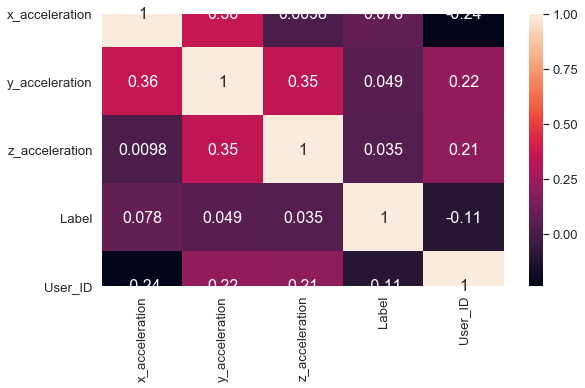

In [13]:
plt.figure(figsize=(9,5))
sns.set(font_scale=1.2)
sns.heatmap(data.corr(), annot=True, annot_kws={"size":16})
plt.show()

### 2.1 Explore each column

#### 2.1.1. x_acceleration

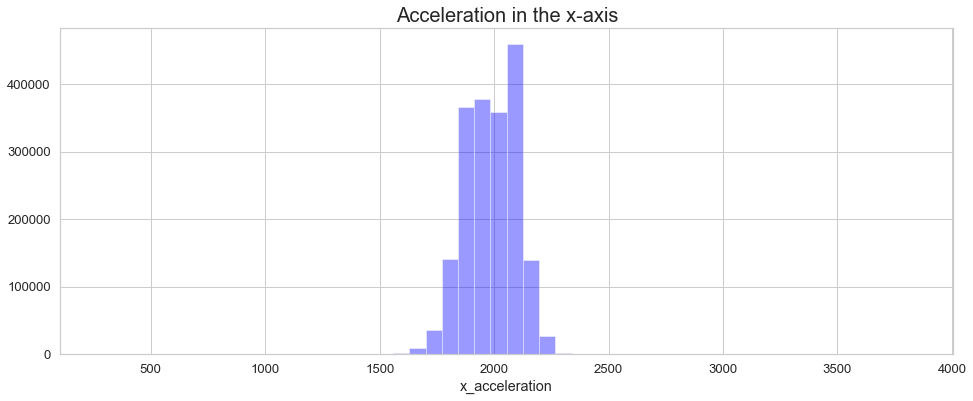

In [14]:
plt.figure(figsize=[16,6])
sns.set_style('whitegrid') 
sns.distplot(data['x_acceleration'],kde=False, color ='blue') 
plt.title('Acceleration in the x-axis',fontsize=20)
plt.show()

__Conclusion:__
1. Most of the x_accelearation lies in between 1500 and 2500. <br>
2. The maximum value of x_acceleration is above 400000

#### 2.1.2. y_acceleration

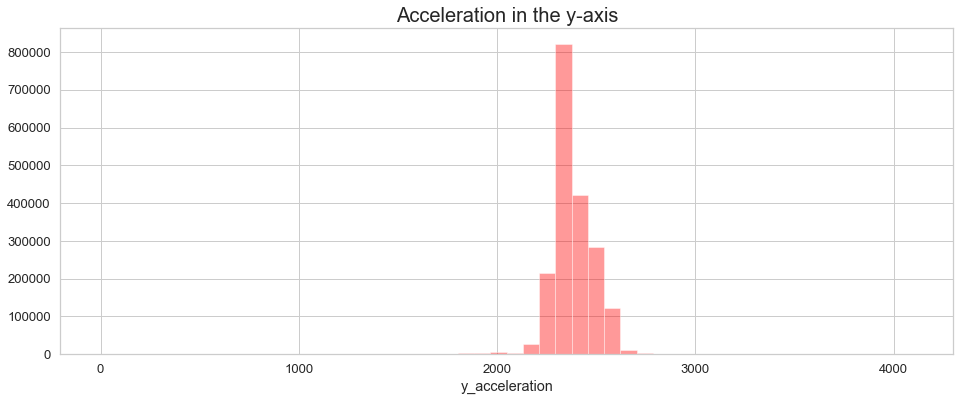

In [15]:
plt.figure(figsize=[16,6])
sns.set_style('whitegrid') 
sns.distplot(data['y_acceleration'],kde=False, color ='red') 
plt.title('Acceleration in the y-axis',fontsize=20)
plt.show()

__Conclusion:__
1. Most of the x_accelearation lies in between 2000 and 3000. <br>
2. The maximum value of y_acceleration is above 800000

#### 2.1.3. z_acceleration

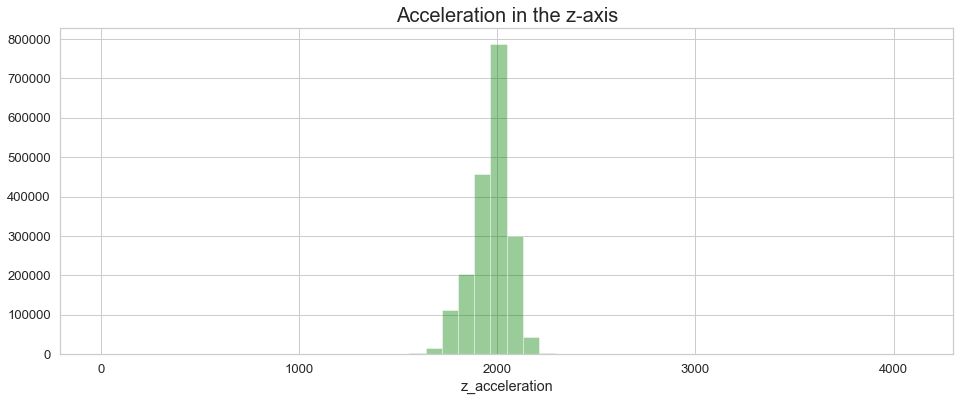

In [16]:
plt.figure(figsize=[16,6])
sns.set_style('whitegrid') 
sns.distplot(data['z_acceleration'],kde=False, color ='green') 
plt.title('Acceleration in the z-axis',fontsize=20)
plt.show()

__Conclusion:__
1. Most of the x_accelearation lies in between 1500 and 2500. <br>
2. The maximum value of z_acceleration is aprroximately equal to 800000.

#### 2.1.4. Label 

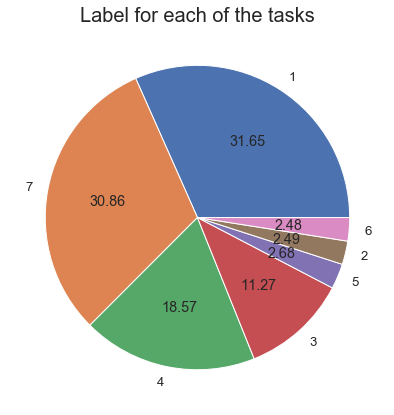

In [17]:
plt.figure(figsize=[7,7])
Values_Label= data['Label'].value_counts()
plt.pie(Values_Label.values, labels=Values_Label.keys(), autopct='%0.2f')
plt.title('Label for each of the tasks',fontsize=20)
plt.show()

__Conclusion:__
1. People have spent most of the time on task 1 i.e. Working at Computer and the least time on task 6 i.e. Walking and Talking with Someone. <br>
2. Task 2,6,5 are the least performed actions. which is around 2.5% <br>
3. Task 1,7 are the most performed actions, which is around 30%.


#### 2.1.5 User_ID

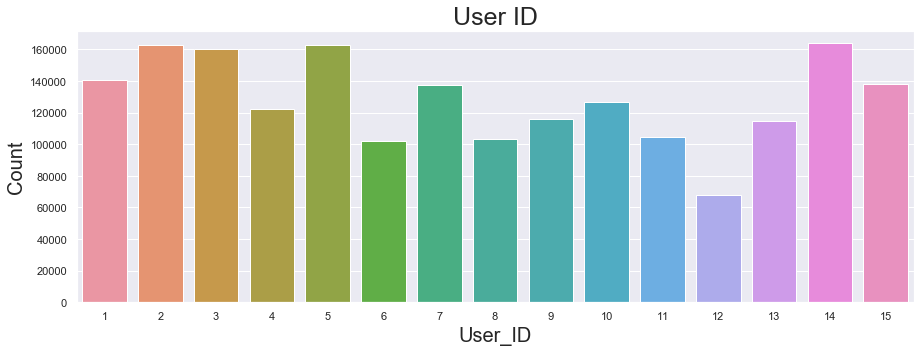

In [18]:
plt.figure(figsize=[15,5])
sns.set(style="darkgrid")
plt.title('User ID',fontsize=25)
ax = sns.countplot(x="User_ID", data=data)
plt.xlabel("User_ID", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.show()

__Conclusion:__
1. Maximum amount of data is available from the Users 2,3,5,14 which is around 160000 data entries.<br>
2. Minimum amount of data is available from the User 12.

### 2.2 Explore the relationship between the pairs of Columns with plausible hypothesis

__Hypothesis 1:__ Time spent by each individual on task 1 (Working on Computer) is the maximum. As the Task 1 is being seen 608667 times in the data, and it is the highest.

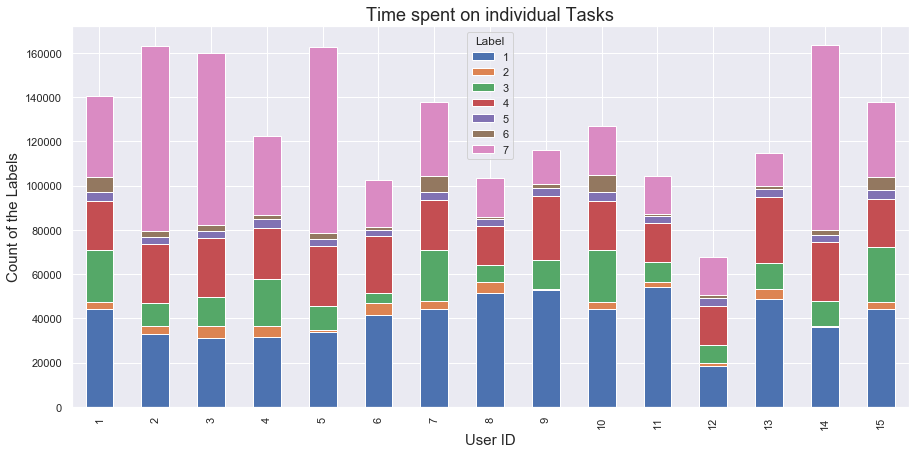

In [19]:
data.groupby(['User_ID','Label']).size().unstack().plot(kind='bar',stacked=True, figsize=[15,7])
plt.title('Time spent on individual Tasks',fontsize=18)
plt.xlabel('User ID',fontsize=15)
plt.ylabel('Count of the Labels',fontsize=15)
plt.show()

__Conclusion:__ Users 2,3,5,14 have spent more time on Task 7 than on Task 1, the stated Hypothesis 1 is false.

__Hypothesis 2:__ Time spent on Task 6 (Walking and Talking with Someone) by the individuals is minimum. Tasks 2,5,6 have the approximately a smaller number of observations on the whole data but task 6 has the least

In [20]:
Label_6 = data[(data['Label']==2) | (data['Label']==5 ) | (data['Label']==6)]

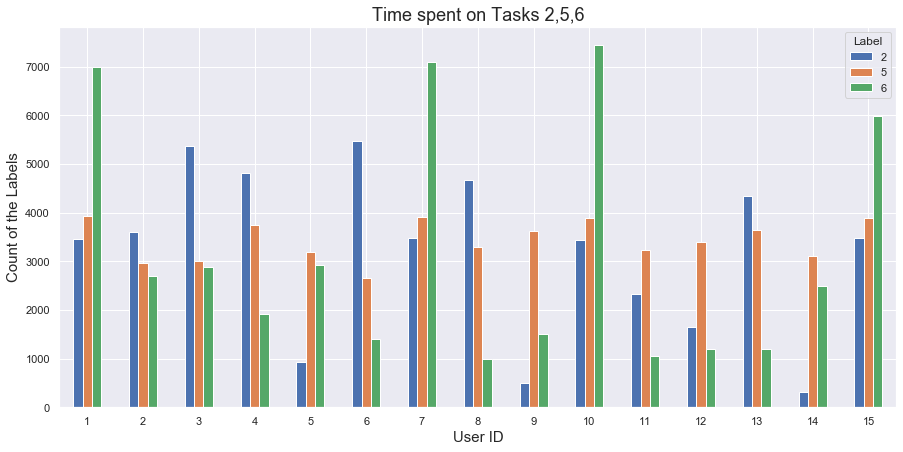

In [21]:
Label_6.groupby(['User_ID','Label']).size().unstack().plot(kind='bar', figsize=[15,7])
plt.title('Time spent on Tasks 2,5,6',fontsize=18)
plt.xlabel('User ID',fontsize=15)
plt.xticks(rotation=0)
plt.ylabel('Count of the Labels',fontsize=15)
plt.show()

__Conclusion:__ Task 6 is not the least performed action when it viewed individually. Hence, the hypothesis 2 is False

__Hypothesis 3:__ Relationship between the acceleration in the x-axis and z-axis is almost null. As the correlation is found to be 0.009827 between the two columns.

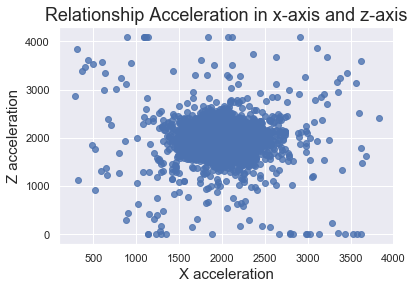

In [22]:
sns.regplot(x=data["x_acceleration"], y=data["z_acceleration"], fit_reg=False)
plt.title('Relationship Acceleration in x-axis and z-axis',fontsize=18)
plt.xlabel('X acceleration',fontsize=15)
plt.ylabel('Z acceleration',fontsize=15)
plt.show()

__Conclusion:__ No relationship can be plotted between the acceleration in x-axis and  z-axis, Hence the hypothesis  3 is True.

__Hypothesis 4:__ Relationship between the acceleration in the x-axis and y-axis is minimum. As the correlation is found to be 0.363657 between the two columns

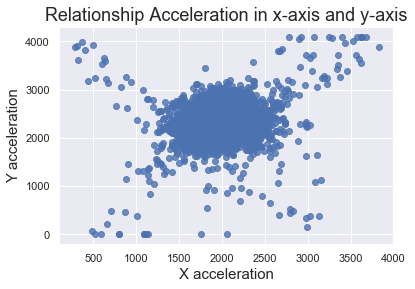

In [23]:
sns.regplot(x=data["x_acceleration"], y=data["y_acceleration"], fit_reg=False)
plt.title('Relationship Acceleration in x-axis and y-axis',fontsize=18)
plt.xlabel('X acceleration',fontsize=15)
plt.ylabel('Y acceleration',fontsize=15)
plt.show()

__Conclusion:__ A positive mild upward linear relationship is detected between the two columns. Hence the hypothesis 4 is True

__Hypothesis 5:__ Relationship between the acceleration in the y-axis and z-axis is minimum and is similar to the relationship between the acceleration in the x-axis and y-axis. As the correlation is found to be 0.345655 between the two columns which is similar to the correlation between the x_acceleration and y_acceleration column.

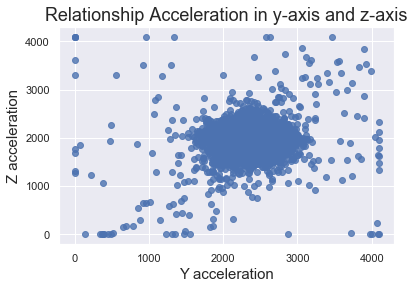

In [24]:
sns.regplot(x=data["y_acceleration"], y=data["z_acceleration"], fit_reg=False)
plt.title('Relationship Acceleration in y-axis and z-axis',fontsize=18)
plt.xlabel('Y acceleration',fontsize=15)
plt.ylabel('Z acceleration',fontsize=15)
plt.show()

__Conclusion:__ A mild positive relationship is found between the two columns, but there are more outliers. Hence the hypothesis 5 is True.

__Hypothesis 6:__ The maximum value of acceleration is for Task 1 in X-axis. Because, the Maximum value of acceleration in the X-axis is found to 3828 and Task 1 has most values(608667).

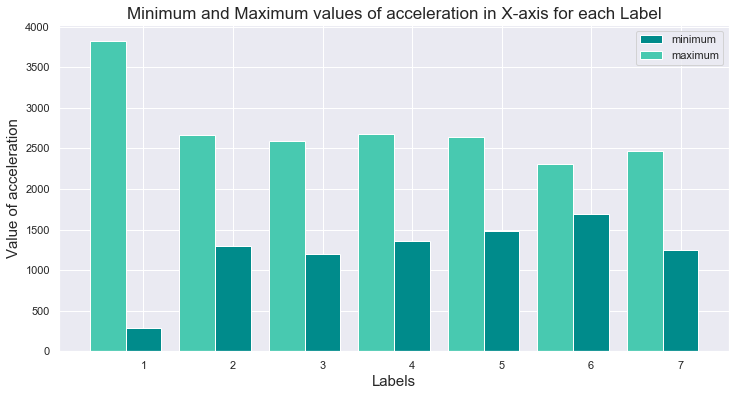

In [25]:
minimum_x_axis={}
maximum_x_axis={}

for i in data.Label.unique():
    maximum_x_axis[i]=(data[(data['Label']==i)]['x_acceleration'].max())
    minimum_x_axis[i]=(data[(data['Label']==i)]['x_acceleration'].min())


X = np.arange(len(minimum_x_axis))
fig, ax = plt.subplots(figsize=(12,6))
                     
ax.bar(X, minimum_x_axis.values(), width=0.4, color='#008B8B', align='center', label='minimum')
ax.bar(X-0.4, maximum_x_axis.values(), width=0.4, color='#48c9b0', align='center',label='maximum')

ax.legend()
plt.xticks(X, ['1','2','3','4','5','6','7'])
plt.xlabel("Labels",fontsize=15)
plt.ylabel("Value of acceleration",fontsize=15)
plt.title("Minimum and Maximum values of acceleration in X-axis for each Label", fontsize=17)
plt.show()


__Conclusion:__ From the graph the hypothesis is True, as the maximum and minimum values are for Task 1

__Hypothesis 7:__ The values of acceleration in the y-axis is plotted against the Labels, to determine the dependency.

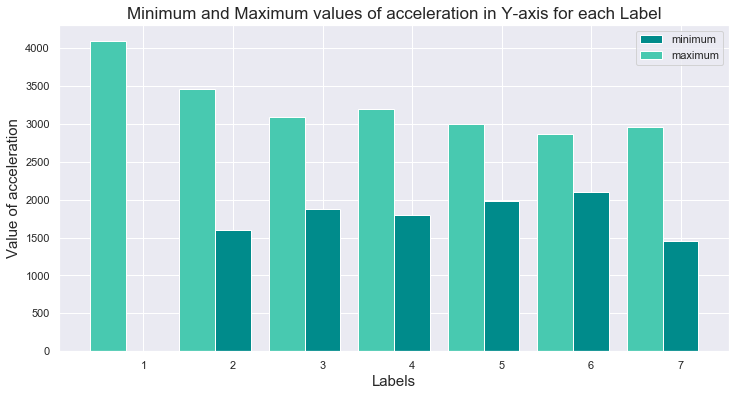

In [26]:
minimum_y_axis={}
maximum_y_axis={}

for i in data.Label.unique():
    maximum_y_axis[i]=(data[(data['Label']==i)]['y_acceleration'].max())
    minimum_y_axis[i]=(data[(data['Label']==i)]['y_acceleration'].min())


X = np.arange(len(minimum_y_axis))
fig, ax = plt.subplots(figsize=(12,6))
                     
ax.bar(X, minimum_y_axis.values(), width=0.4, color='#008B8B', align='center', label='minimum')
ax.bar(X-0.4, maximum_y_axis.values(), width=0.4, color='#48c9b0', align='center',label='maximum')

ax.legend()
plt.xticks(X, ['1','2','3','4','5','6','7'])
plt.xlabel("Labels",fontsize=15)
plt.ylabel("Value of acceleration",fontsize=15)
plt.title("Minimum and Maximum values of acceleration in Y-axis for each Label", fontsize=17)
plt.show()
 

__Conclusion:__ The Tasks other than the first one has the values of maximum and minimum values in the same range, The Task1 has extreme values.

__Hypothesis 8:__ The values of acceleration in the z-axis is plotted against the Labels, to determine the dependency.

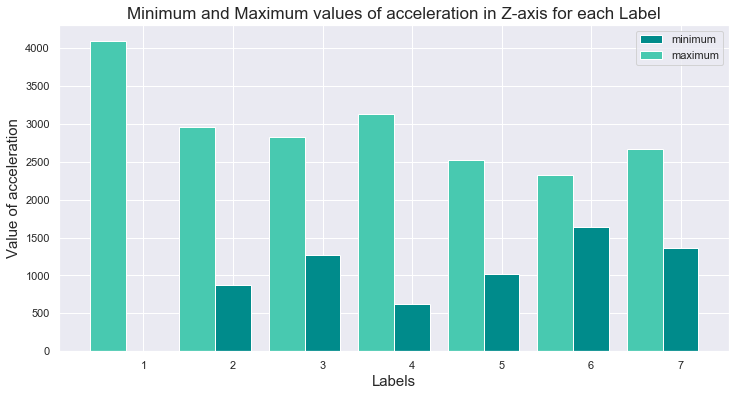

In [27]:
minimum_z_axis={}
maximum_z_axis={}

for i in data.Label.unique():
    maximum_z_axis[i]=(data[(data['Label']==i)]['z_acceleration'].max())
    minimum_z_axis[i]=(data[(data['Label']==i)]['z_acceleration'].min())


X = np.arange(len(minimum_z_axis))
fig, ax = plt.subplots(figsize=(12,6))
                     
ax.bar(X, minimum_z_axis.values(), width=0.4, color='#008B8B', align='center', label='minimum')
ax.bar(X-0.4, maximum_z_axis.values(), width=0.4, color='#48c9b0', align='center',label='maximum')

ax.legend()
plt.xticks(X, ['1','2','3','4','5','6','7'])
plt.xlabel("Labels",fontsize=15)
plt.ylabel("Value of acceleration",fontsize=15)
plt.title("Minimum and Maximum values of acceleration in Z-axis for each Label", fontsize=17)
plt.show()
 

__Conclusion:__ The maximum and minimum values for all tasks have different values and task 1 has the extreme value in both maximum and minimum values.

__Hypothesis 9:__ The labelling of the tasks is more dependent on the x_acceleration than on the y and z axis acceleration.As, the correlation of x-axis with Label is the highest.

In [28]:
def User_plot(User):
    plt.figure()
    for i in range(User.shape[1]):
        plt.figure(figsize=(14,6))
        plt.subplot(User.shape[1],1,i+1)
        plt.plot(User[:,i],color='#008B8B')
        plt.show()

User_ID 1
The acceleration in x,y,z axis and the Labels


<Figure size 432x288 with 0 Axes>

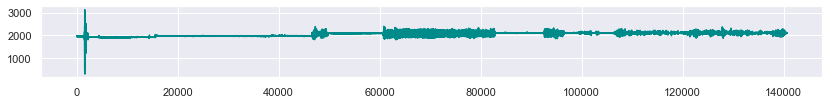

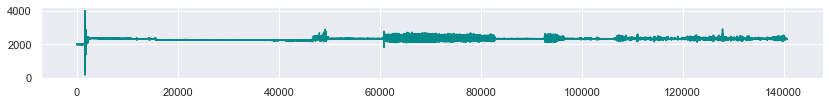

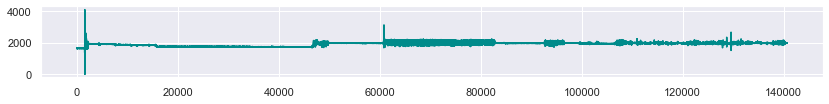

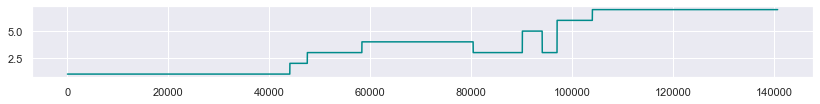

End of 1 plot

User_ID 2
The acceleration in x,y,z axis and the Labels


<Figure size 432x288 with 0 Axes>

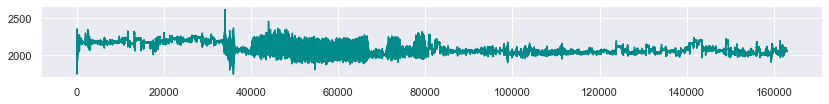

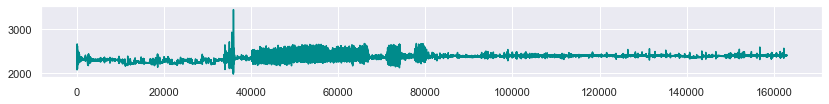

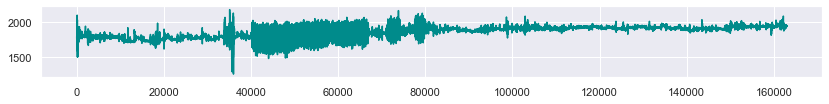

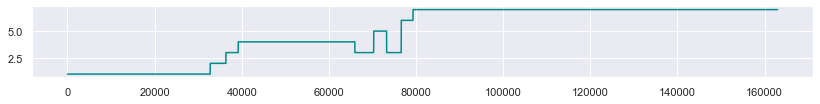

End of 2 plot

User_ID 3
The acceleration in x,y,z axis and the Labels


<Figure size 432x288 with 0 Axes>

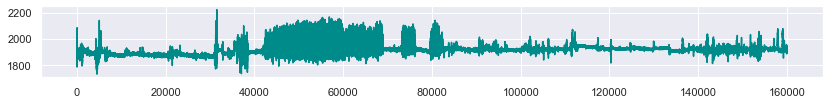

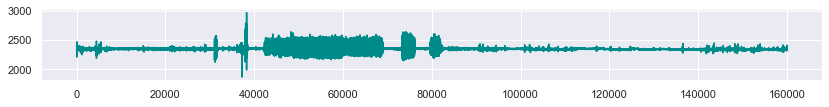

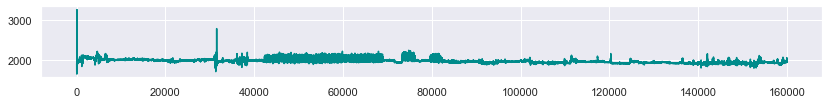

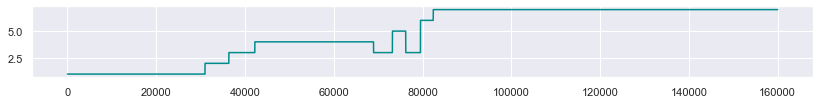

End of 3 plot

User_ID 4
The acceleration in x,y,z axis and the Labels


<Figure size 432x288 with 0 Axes>

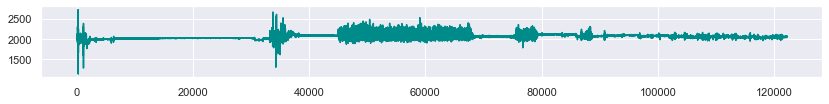

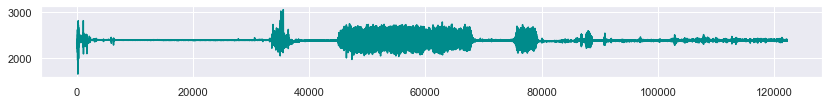

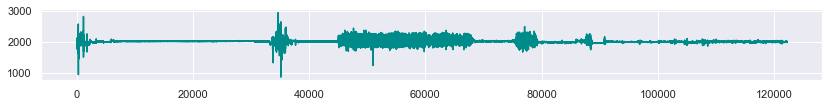

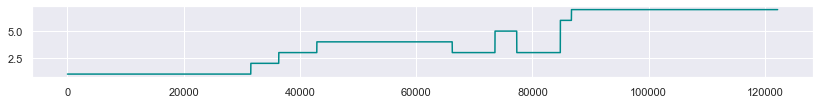

End of 4 plot

User_ID 5
The acceleration in x,y,z axis and the Labels


<Figure size 432x288 with 0 Axes>

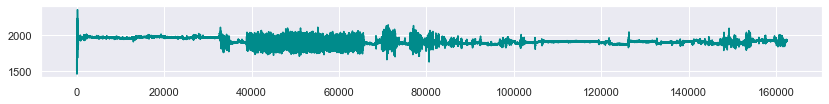

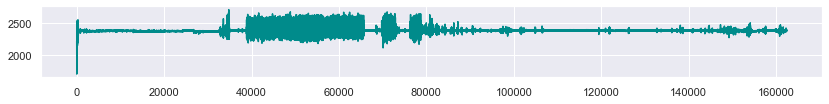

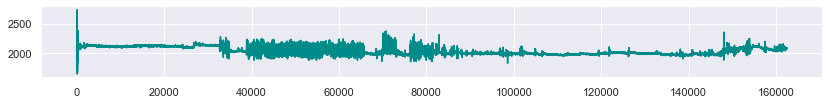

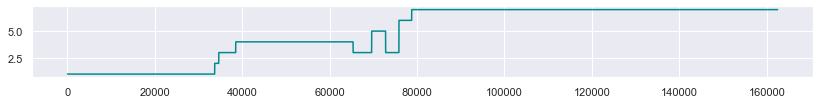

End of 5 plot

User_ID 6
The acceleration in x,y,z axis and the Labels


<Figure size 432x288 with 0 Axes>

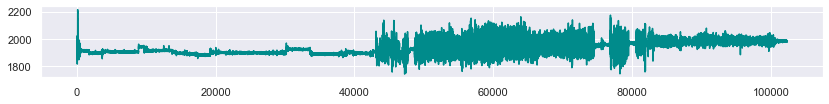

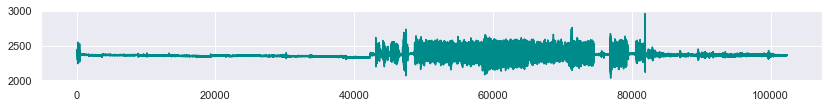

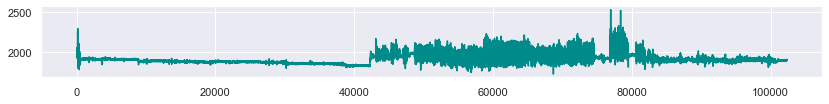

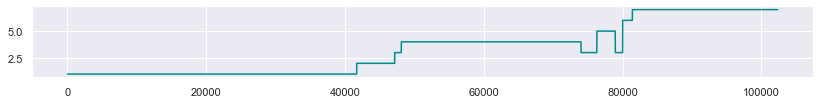

End of 6 plot

User_ID 7
The acceleration in x,y,z axis and the Labels


<Figure size 432x288 with 0 Axes>

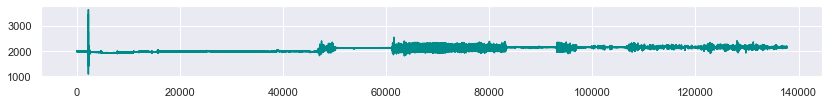

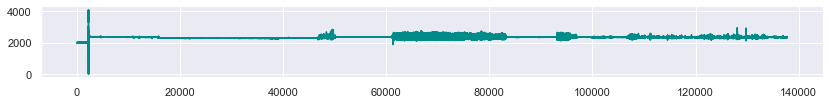

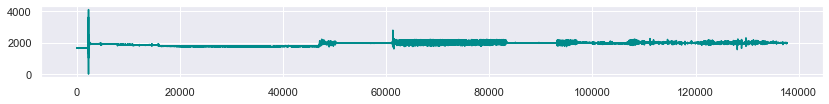

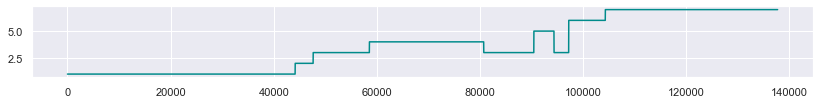

End of 7 plot

User_ID 8
The acceleration in x,y,z axis and the Labels


<Figure size 432x288 with 0 Axes>

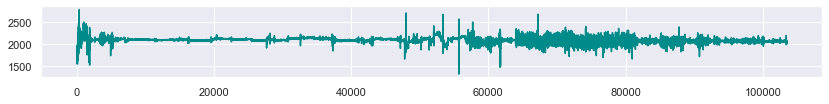

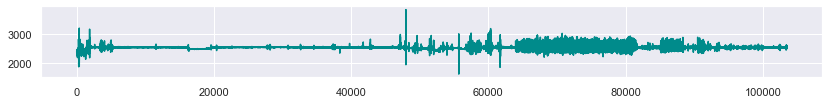

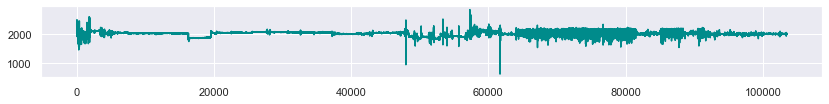

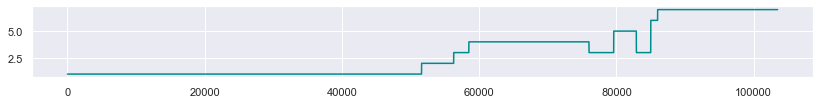

End of 8 plot

User_ID 9
The acceleration in x,y,z axis and the Labels


<Figure size 432x288 with 0 Axes>

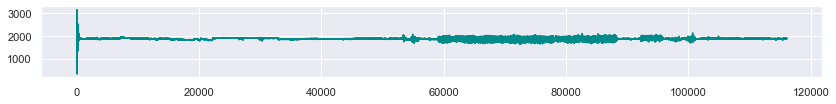

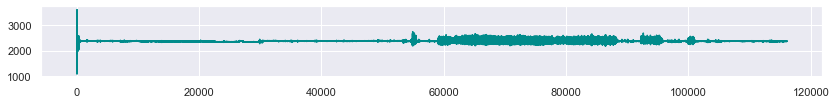

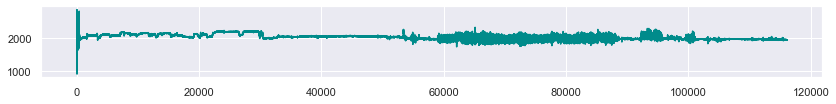

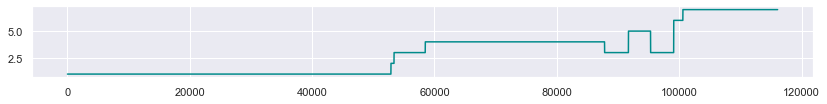

End of 9 plot

User_ID 10
The acceleration in x,y,z axis and the Labels


<Figure size 432x288 with 0 Axes>

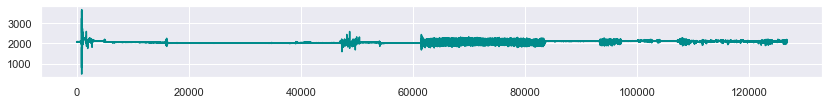

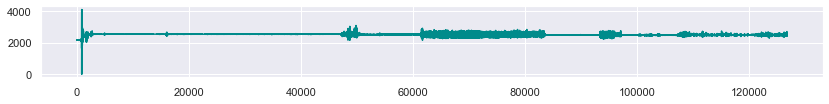

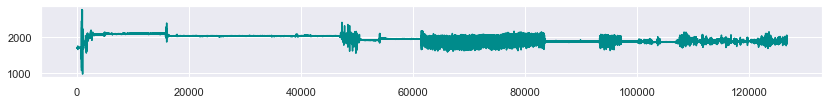

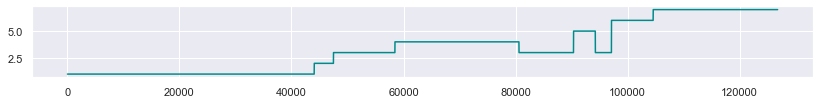

End of 10 plot

User_ID 11
The acceleration in x,y,z axis and the Labels


<Figure size 432x288 with 0 Axes>

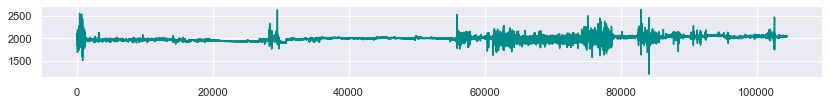

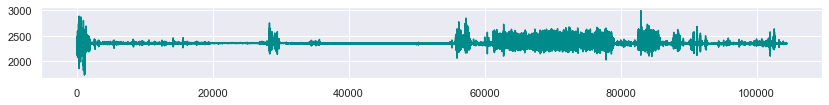

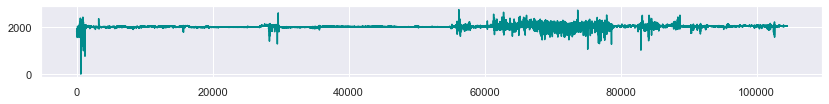

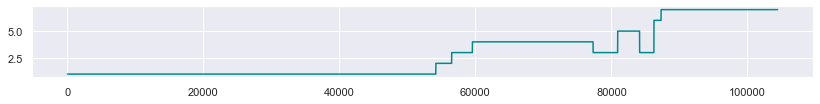

End of 11 plot

User_ID 12
The acceleration in x,y,z axis and the Labels


<Figure size 432x288 with 0 Axes>

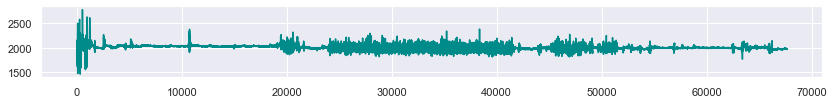

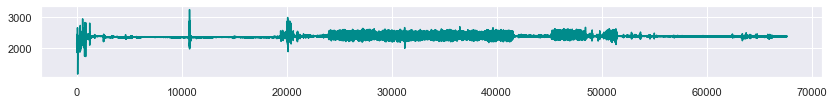

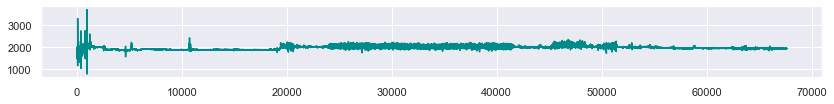

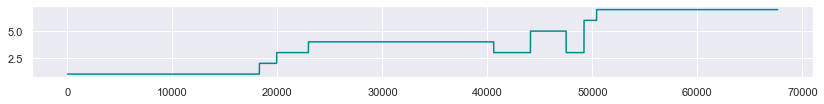

End of 12 plot

User_ID 13
The acceleration in x,y,z axis and the Labels


<Figure size 432x288 with 0 Axes>

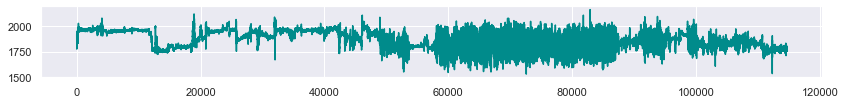

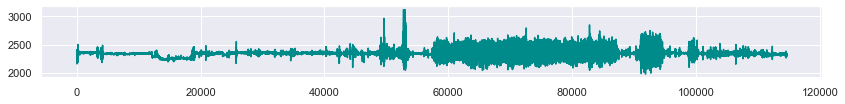

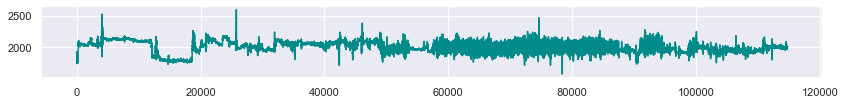

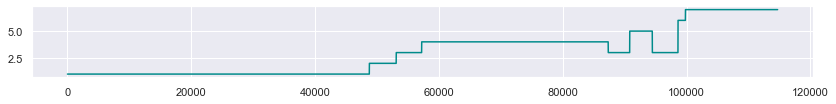

End of 13 plot

User_ID 14
The acceleration in x,y,z axis and the Labels


<Figure size 432x288 with 0 Axes>

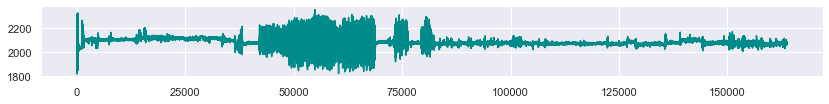

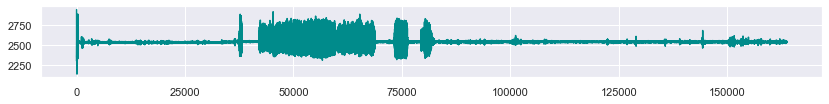

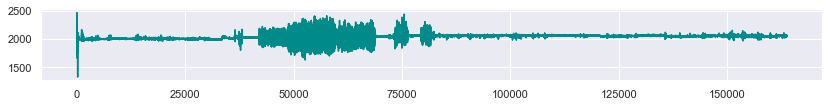

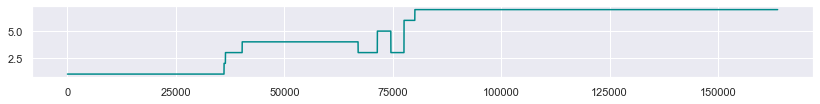

End of 14 plot

User_ID 15
The acceleration in x,y,z axis and the Labels


<Figure size 432x288 with 0 Axes>

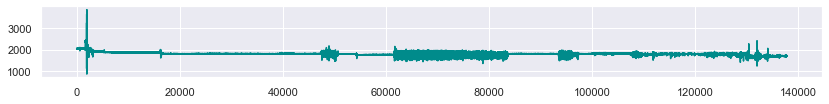

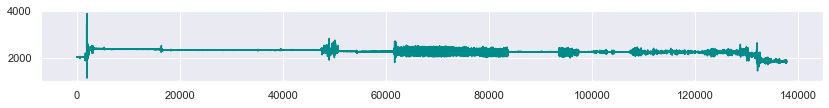

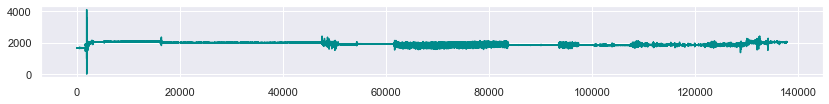

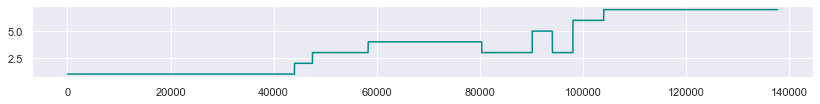

End of 15 plot



In [29]:
for i in data.User_ID.unique():
    print('User_ID',i)
    print('The acceleration in x,y,z axis and the Labels')
    User_plot(data[data.User_ID==i].iloc[:,:4].values)
    print('End of',i,'plot\n')

__Conclusion:__ The labels are dependent on all x,y,z axis acceleration.Hence, the hypothesis 9 is False

__Hypothesis 10:__ Time spent on Task 6 on a whole is the minimum. As the individual evaluation of the graph predicted that the Task 6 is least performed.

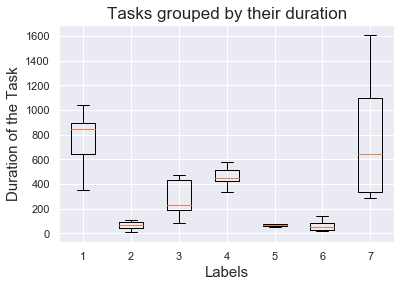

In [30]:
new_data=[]
for k,values in data.groupby('User_ID'):
    new_data.append(values.iloc[:,:4].values)

def activity_group(new_data,Labels):
    activity_groups=[{label:new[new[:,-1]==label] for label in Labels} for new in new_data]
    return activity_groups

def duration(activity_groups,Labels):
    frequency=52
    time_range = [[len(new[act])/frequency for new in activity_groups] for act in Labels]
    return time_range

def durations_plot(activity_groups,Labels):
    time_range = duration(activity_groups,Labels)
    plt.boxplot(time_range, labels=Labels)
    plt.title("Tasks grouped by their duration",fontsize=17 )
    plt.xlabel("Labels",fontsize=15)
    plt.ylabel("Duration of the Task",fontsize=15)
    plt.show()
    
Labels=[label for label in range(1,8)]
activity_groups=activity_group(new_data,Labels)
durations_plot(activity_groups,Labels)




__Conclusion:__  After grouping the activities for the individuals it can be seen that Task 5 is the least performed Task. Hence hypothesis 10 is False.

***

## Task 3: Data Modelling

In [31]:
X = data[['x_acceleration', 'y_acceleration', 'z_acceleration','User_ID']]
y = data['Label']

### 3.1 Decision Tree

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

decision_tree_model = DecisionTreeClassifier(random_state=0)
clf = decision_tree_model.fit(X_train, y_train)
decision_pred = decision_tree_model.predict(X_test)

print("Accuracy score using Decision tree is",accuracy_score(y_test, decision_pred))


Accuracy score using Decision tree is 0.731501991493256


#### Hill Climbing method to determine the parameters for the Decision tree

In [33]:
data_col = []
current_Mscore = 0.0
Num_columns = 4
shuf_columns = shuffle(range(0,Num_columns), random_state=1)
ls=['x_acceleration', 'y_acceleration', 'z_acceleration','User_ID']


for cols in range(0, Num_columns): 
    data_col.append(ls[shuf_columns[cols]])
    print(data_col)
    
    newData = data[data_col]
    X_Train, X_Test, Y_Train, Y_Test = train_test_split(newData, data['Label'], test_size=0.30, random_state=0)
    dtree_classifier = DecisionTreeClassifier()

    fit = dtree_classifier.fit(X_Train, Y_Train)
    new_Score = dtree_classifier.score(X_Test, Y_Test)
    
    if new_Score < current_Mscore:
        data_col.remove(shuf_columns[cols])
    else:
        current_Mscore = new_Score
        print("Score with " + str(len(data_col)) + " selected features: " + str(new_Score))

print("There are " + str(len(data_col)) + " features selected:", data_col)

['User_ID']
Score with 1 selected features: 0.4198497627193849
['User_ID', 'z_acceleration']
Score with 2 selected features: 0.643552172270233
['User_ID', 'z_acceleration', 'x_acceleration']
Score with 3 selected features: 0.6914000076262579
['User_ID', 'z_acceleration', 'x_acceleration', 'y_acceleration']
Score with 4 selected features: 0.731560921667932
There are 4 features selected: ['User_ID', 'z_acceleration', 'x_acceleration', 'y_acceleration']


The accuracy of the model remains the same after applying the hill climbing technique, hence it is not used.

In [34]:
# Accuracy is put into a list to plot a graph for comparison
test_accuracy = decision_tree_model.score(X_test, y_test)
train_accuracy = decision_tree_model.score(X_train, y_train)

decision_score=[test_accuracy,train_accuracy]

In [35]:
cv = confusion_matrix(y_test, decision_pred)
print("Confusion matrix\n",cv)

Confusion matrix
 [[169315   3553   2178   4040    647    228   2609]
 [  5241   4509    964   2100    247    114   1217]
 [  2086   1041  32438  11697   2998   1932  12780]
 [  4049   2264  13352  68818   4737   2787  10797]
 [   591    253   3795   4248   3519    690   2379]
 [   223    116   2387   2411    789   3566   4967]
 [  2825   1309  15127  11026   2808   5309 139878]]


In [36]:
decision_cr = classification_report(y_test,decision_pred)
print("Classification report\n",decision_cr)

Classification report
               precision    recall  f1-score   support

           1       0.92      0.93      0.92    182570
           2       0.35      0.31      0.33     14392
           3       0.46      0.50      0.48     64972
           4       0.66      0.64      0.65    106804
           5       0.22      0.23      0.23     15475
           6       0.24      0.25      0.25     14459
           7       0.80      0.78      0.79    178282

    accuracy                           0.73    576954
   macro avg       0.52      0.52      0.52    576954
weighted avg       0.73      0.73      0.73    576954



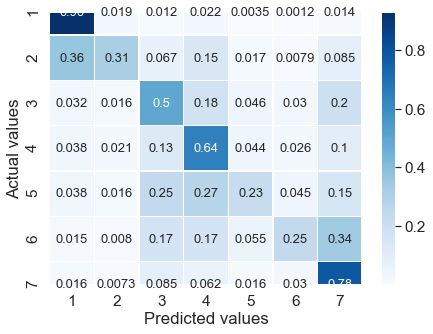

In [37]:
target_names=[1,2,3,4,5,6,7]
#The values are normalised in order to plot the confusion matrix
decision_tree_cm = cv.astype('float') / cv.sum(axis=1)[:, np.newaxis]

#Confusion matrix is plotted for the normalised values obtained with the Labels
dtree_cm = pd.DataFrame(decision_tree_cm, columns=np.unique(target_names), index = np.unique(target_names))
dtree_cm.index.name = 'Actual values'
dtree_cm.columns.name = 'Predicted values'

plt.figure(figsize = (7,5))
sns.set(font_scale=1.4)
sns.heatmap(dtree_cm, cmap="Blues",linewidth=0.5, annot=True,annot_kws={"size":13})
plt.show()

***End of Decision Tree***

### 3.2 K - Nearest Neighbours Classifier

#### Elbow Method to determine the optimal value of K

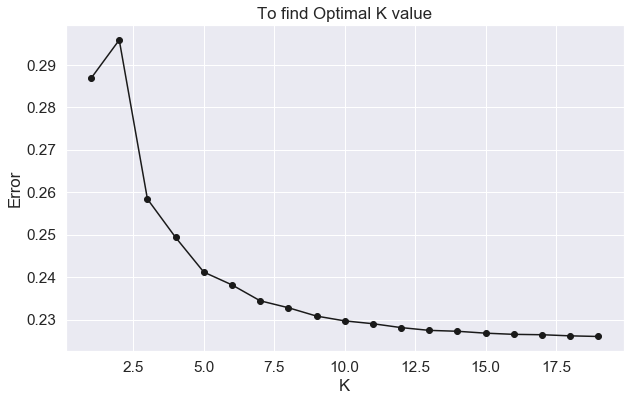

In [38]:
non_optimal=[]

for optimal_k in range(1,20):
    KNN = KNeighborsClassifier(n_neighbors=optimal_k)
    KNN.fit(X_train,y_train)
    pred_optimal_k = KNN.predict(X_test)
    non_optimal.append(np.mean(pred_optimal_k != y_test))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,20), non_optimal, '-ok')
plt.title('To find Optimal K value')
plt.xlabel('K')
plt.ylabel('Error')
plt.show()

From the elbow method the value of K is choosen, The accuracy remains the same for the value of K from range (8 to 20), hence 8 is choosen as the optimal value.

In [39]:
KNN_classifier = KNeighborsClassifier(8, weights='distance')
KNN_classifier.fit(X_train, y_train)
y_pred = KNN_classifier.predict(X_test)

print("Accuracy score using KNN Classifier is: {}".format(accuracy_score(y_test, y_pred)))

Accuracy score using KNN Classifier is: 0.7602373846095183


#### Hill Climbing Technique to select the Features for KNN classifier

In [40]:
data_cols = []
current_MScore = 0.0
number_cols = 4
shuffle_data_cols = shuffle(range(0,number_cols), random_state=1)
ls = ['x_acceleration', 'y_acceleration', 'z_acceleration','User_ID']


for cols in range(0, number_cols): 
    data_cols.append(ls[shuffle_data_cols[cols]])
    newData = data[data_cols]
    X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split(newData, data['Label'], test_size=0.30, random_state=0)
    
    KNN_classifier = KNeighborsClassifier(8, weights='distance')
    fit = KNN_classifier.fit(X_TRAIN, Y_TRAIN)
    present_Score = KNN_classifier.score(X_TEST, Y_TEST)
    
    if present_Score < current_MScore:
        data_cols.remove(shuffle_data_cols[cols])
    else:
        current_MScore = present_Score
        print("Score with " + str(len(data_cols)) + " selected features: " + str(present_Score))

print("There are " + str(len(data_cols)) + " features selected:", data_cols)

Score with 1 selected features: 0.33543228749605686
Score with 2 selected features: 0.6098302464321246
Score with 3 selected features: 0.6914606710413655
Score with 4 selected features: 0.7602235186860651
There are 4 features selected: ['User_ID', 'z_acceleration', 'x_acceleration', 'y_acceleration']


The Hill Climbing Technique gives the same accuracy as all the 4 features were selected previously.

#### Parameter tuning effect

In [41]:
KNN_classifier = KNeighborsClassifier(8, weights='distance', p=1)
KNN_classifier.fit(X_train, y_train)
y_pred = KNN_classifier.predict(X_test)

print("Accuracy score using KNN Classifier after parameter tuning is",accuracy_score(y_test, y_pred))

Accuracy score using KNN Classifier after parameter tuning is 0.7645288879182742


The accuracy has been increased by 0.004. Hence, the parameter tuning effect is taken into consideration.

In [42]:
KNN_classifier_param = KNeighborsClassifier(8, weights='distance', p=1)
KNN_classifier_param.fit(X_train, y_train)
y_pred = KNN_classifier_param.predict(X_test)

print("Accuracy score using KNN Classifier is: {}".format(accuracy_score(y_test, y_pred)))

Accuracy score using KNN Classifier is: 0.7645288879182742


In [43]:
test_accuracy = KNN_classifier_param.score(X_test, y_test)
train_accuracy = KNN_classifier_param.score(X_train, y_train)

KNN_score=[test_accuracy,train_accuracy]

In [44]:
k_confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix is\n",k_confusion_matrix)

Confusion matrix is
 [[171281   1982   1374   4438    230     87   3178]
 [  5267   3535    819   2780    103     61   1827]
 [  2233    466  32074  13637   1794   1180  13588]
 [  5472    662   7928  78789   1191    627  12135]
 [   954     90   3196   5814   2362    383   2676]
 [   289     46   1981   2760    510   3419   5454]
 [  3173    622  10186  10617   1148   2898 149638]]


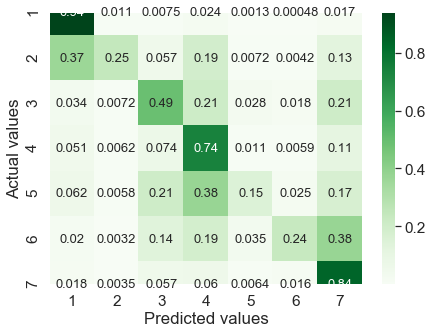

In [45]:
target_names=[1,2,3,4,5,6,7]
#The values are normalised in order to plot the confusion matrix
conf_matrix = k_confusion_matrix.astype('float') / k_confusion_matrix.sum(axis=1)[:, np.newaxis]

#Confusion matrix is plotted for the normalised values obtained with the Labels
df_cm_k = pd.DataFrame(conf_matrix, columns=np.unique(target_names), index = np.unique(target_names))
df_cm_k.index.name = 'Actual values'
df_cm_k.columns.name = 'Predicted values'

plt.figure(figsize = (7,5))
sns.set(font_scale=1.4)
sns.heatmap(df_cm_k, cmap="Greens", annot=True,annot_kws={"size": 13})
plt.show()

In [46]:
knn_cr=classification_report(y_test, y_pred)
print("Classification report\n",knn_cr)

Classification report
               precision    recall  f1-score   support

           1       0.91      0.94      0.92    182570
           2       0.48      0.25      0.32     14392
           3       0.56      0.49      0.52     64972
           4       0.66      0.74      0.70    106804
           5       0.32      0.15      0.21     15475
           6       0.40      0.24      0.30     14459
           7       0.79      0.84      0.82    178282

    accuracy                           0.76    576954
   macro avg       0.59      0.52      0.54    576954
weighted avg       0.75      0.76      0.75    576954



***End of KNN Classifier***

### Comparison between Decision tree and KNN Classifier

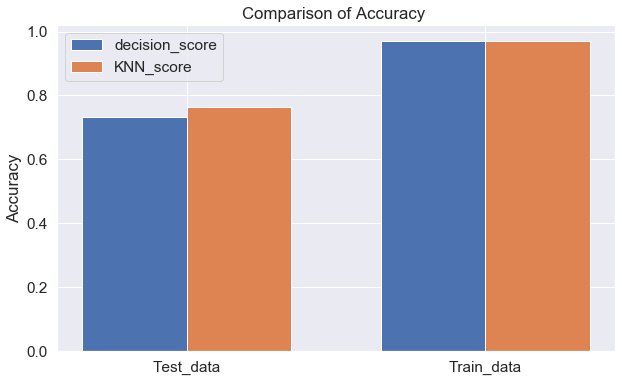

In [47]:
ind = np.arange(2) 
width = 0.35
plt.figure(figsize=(10,6))
plt.bar(ind, decision_score, width, label='decision_score')
plt.bar(ind + width, KNN_score, width, label='KNN_score')

plt.ylabel('Accuracy')
plt.title('Comparison of Accuracy ')

plt.xticks(ind + width / 2, ('Test_data', 'Train_data'))
plt.legend(loc='best')
plt.show()

1.	Accuracy of Decision tree is `73.15%` and KNN Classifier is `76.45%` on the Test data, and the accuracy is same for the train data.
2.	Accuracy from the KNN Classifier is slightly higher than that of Decision tree. 
3.	The computational complexity for KNN is comparatively more for the Decision tree on the dataset.
4.	The precision score for Decision tree is `0.52` and KNN classifier is `0.59`.

__Recommendation:__ `K-Nearest Neighbours` is a better classifier on the Accelerometer dataset


***

***End***